In [248]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [278]:
# Path to the directory containing the .txt files
files_path = 'data/full_pubmed_raw/'
headers = ["PMID", "Year", "Journal", "Title", "AbstractText", "DOI"]

# Get a list of all .txt files in the directory
file_list = glob.glob(os.path.join(files_path, '*.txt'))

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop over each file and read it into a DataFrame
for file_path in file_list:
    if os.path.getsize(file_path) == 0:
        print(f"Skipping zero-byte file: {file_path}")
        continue
    # Assuming the .txt files are tab-separated; adjust delimiter as needed
    df = pd.read_csv(file_path, sep=r'\^!\^', names=headers,  engine='python')  # Change 'sep' if files use a different delimiter
    # Check if the DataFrame is empty and skip if so
    df_list.append(df)  # Append each DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
all_data_df = pd.concat(df_list, ignore_index=True)

Skipping zero-byte file: data/full_pubmed_raw/pmid_contents_chunk_498.txt


In [279]:
all_data_df['Year'] = pd.to_numeric(all_data_df['Year'], errors='coerce')#.astype(int)


In [280]:
all_data_df.shape

(2436276, 6)

In [281]:
all_data_df.head()

,PMID,Year,Journal,Title,AbstractText,DOI
0,15008584,2004.0,Pediatric clinics of North America,Neurologic disorders masquerading as pediatric...,Neurologic disorders may present or masquerade...,10.1016/s0031-3955(03)00180-9
1,15008585,2004.0,Pediatric clinics of North America,Pediatric sleep pharmacology: you want to give...,There is a need for greater information about ...,10.1016/s0031-3955(03)00179-2
2,15008586,2004.0,Pediatric clinics of North America,Nonpharmacologic treatments for pediatric slee...,Because of the high prevalence of sleep proble...,10.1016/s0031-3955(03)00178-0
3,15008589,2004.0,Pediatric clinics of North America,Neurocognitive dysfunction and sleep in childr...,"Sleep disturbance in children, whether because...",10.1016/s0031-3955(03)00184-6
4,15008590,2004.0,Pediatric clinics of North America,Sleep problems in children with common medical...,Sleep problems are common in many pediatric me...,10.1016/s0031-3955(03)00185-8


In [282]:
# DataFrame with rows where 'AbstractText' is empty or NaN
df_empty_abstracts = all_data_df[all_data_df['AbstractText'].isna()]

# DataFrame with rows where 'AbstractText' is not empty
df_non_empty_abstracts = all_data_df[all_data_df['AbstractText'].notna()]


In [283]:
percentage_empty = (len(df_empty_abstracts) / (len(df_empty_abstracts)+len(df_non_empty_abstracts))) * 100
percentage_empty

22.351531599867997

In [284]:
df_empty_abstracts_before_2000 = df_empty_abstracts[df_empty_abstracts['Year'] < 2000]

# Calculate the percentage
percentage_empty_before_2000 = (len(df_empty_abstracts_before_2000) / len(df_empty_abstracts)) * 100
percentage_empty_before_2000

55.8381768265249

In [285]:
df_empty_abstracts.shape, df_non_empty_abstracts.shape

((544545, 6), (1891731, 6))

In [286]:
df_empty_abstracts

,PMID,Year,Journal,Title,AbstractText,DOI
5,15008618,2004.0,Mayo Clinic proceedings,Effects of a low-carbohydrate diet.,NaN,10.4065/79.3.431
6,15008619,2004.0,Mayo Clinic proceedings,Effects of a low-carbohydrate diet.,NaN,10.4065/79.3.431-a
10,15008639,2004.0,Mental retardation,Use of the Minnesota multiphasic personality i...,NaN,10.1352/0047-6765(2004)42<151:UOTMMP>2.0.CO;2
11,15008640,2004.0,Mental retardation,Nirje's Eight Planks.,NaN,10.1352/0047-6765(2004)42<147:NEP>2.0.CO;2
26,15008744,2004.0,BJU international,Diagnostic potential unmasked.,NaN,10.1111/j.1464-410x.2003.04700.x
...,...,...,...,...,...,...
2436252,15285206,2004.0,European journal of health law,"ECHR 2004/5 case of Rakevich v. Russia, 28 Oct...",NaN,None
2436256,15285210,2004.0,Administration and policy in mental health,Harm reduction: a historic parallel and parable.,NaN,10.1023/b:apih.0000028897.89690.9a
2436257,15285211,2004.0,Administration and policy in mental health,Self-help groups in Hong Kong.,NaN,10.1023/b:apih.0000028898.11943.53
2436259,15285278,2004.0,Alternative therapies in health and medicine,Cochrane for CAM providers: evidence for action.,NaN,None


In [519]:
import matplotlib.pyplot as plt

def plot_year_counts(df, year_column, plt_save_suffix, tick_interval=5, bar_color='skyblue', label_fontsize=12, axis_label_fontsize=14, title_fontsize=16):
    """
    Plot a bar chart showing the count of entries per year, with values displayed in thousands.
    
    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - year_column (str): The column name for the year data.
    - tick_interval (int): Interval for x-axis ticks (default is 5 years).
    - bar_color (str): Color of the bars (default is 'skyblue').
    - label_fontsize (int): Font size of the labels on each bar (default is 12).
    - axis_label_fontsize (int): Font size of x and y axis labels (default is 14).
    - title_fontsize (int): Font size of the plot title (default is 16).
    """
    # Count and drop NaN values in the year column
    initial_count = len(df)
    df = df.dropna(subset=[year_column])
    dropped_count = initial_count - len(df)
    
    # Report the number of dropped rows
    print(f"Dropped {dropped_count} rows with NaN values in the '{year_column}' column.")
    
    # Convert the 'year_column' to integer type
    df[year_column] = df[year_column].astype(int)
    
    # Group by year and count entries, sorting by year, then convert to thousands
    year_counts = (df[year_column].value_counts().sort_index()) / 1000
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    ax = year_counts.plot(kind='bar', color=bar_color, zorder=2)
    
    # Set x and y labels with increased font size
    plt.xlabel('Year', fontsize=axis_label_fontsize)
    plt.ylabel('Count (in thousands)', fontsize=axis_label_fontsize)
    plt.title('Count of Entries by Year', fontsize=title_fontsize)
    
    # Set x-axis ticks to display every `tick_interval` years
    ax.set_xticks(range(0, len(year_counts), tick_interval))
    ax.set_xticklabels([str(year) for year in year_counts.index[::tick_interval]], fontsize=axis_label_fontsize, rotation=0)
    
    # Set y-axis tick label font size
    ax.tick_params(axis='y', labelsize=axis_label_fontsize)
    
    # Add labels on top of each bar, showing count in thousands with "k"
    for i, count in enumerate(year_counts):
        if i % 2 == 0:  # Skip even indices
            continue
        if count < 1:
            continue
        ax.text(i, count + 0.1, f'{count:.0f}k', ha='center', va='bottom', fontsize=label_fontsize)
    
    # Add a light grid on the y-axis
    ax.grid(axis='y', linestyle='--', alpha=0.4, color='gray', zorder=0)
    
    plt.tight_layout()
    plt.savefig(f"./viz/neuro_pubmed/pmid_count_over_time_{plt_save_suffix}.png")
    plt.show()


Dropped 5879 rows with NaN values in the 'Year' column.


/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_7070/592000225.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[year_column] = df[year_column].astype(int)


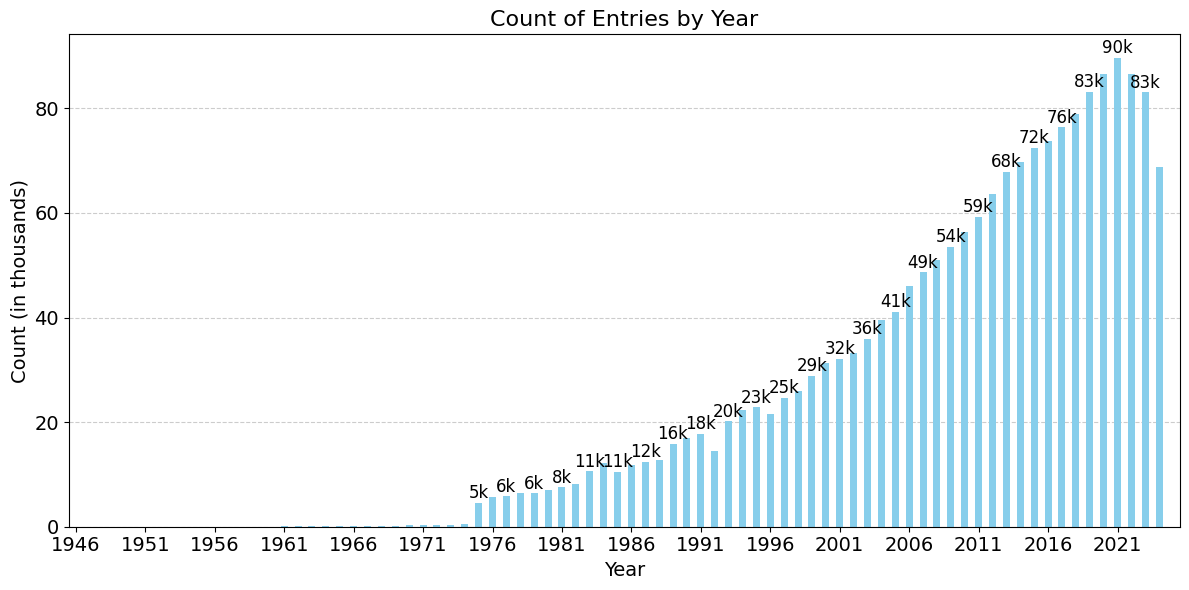

In [516]:
plot_year_counts(df_non_empty_abstracts, 'Year', 'with_abstracts')

Dropped 5416 rows with NaN values in the 'Year' column.


/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_7070/3107582768.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[year_column] = df[year_column].astype(int)


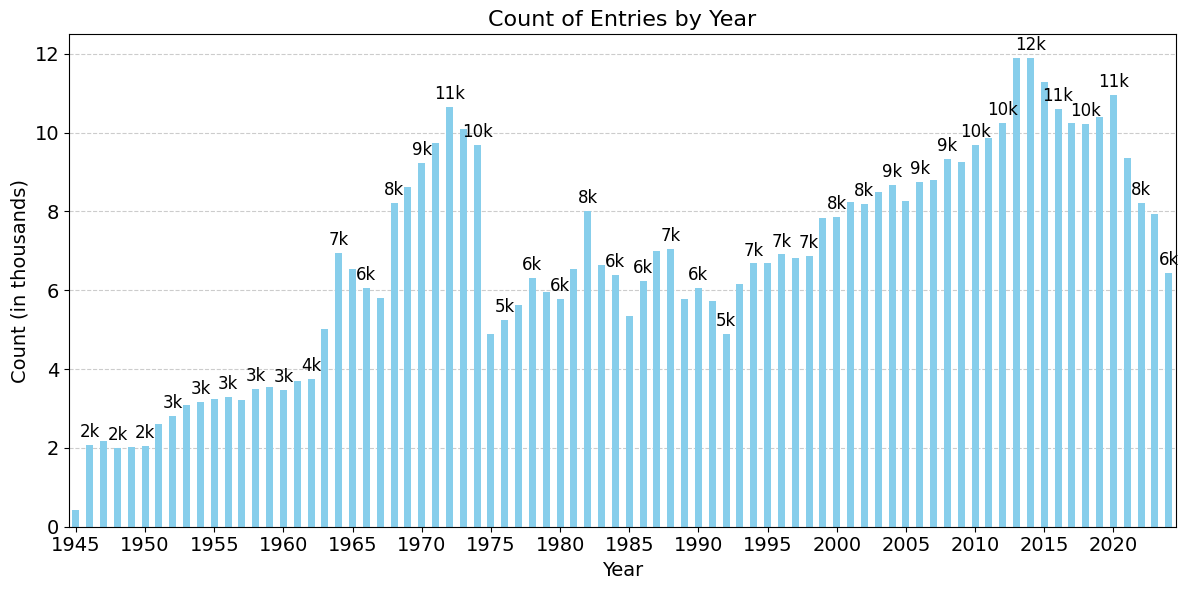

In [521]:
plot_year_counts(df_empty_abstracts, 'Year', 'missing_abstracts')

In [559]:
def plot_top_journals_count(df, journal_column, plt_save_suffix, num_top=10, bar_color='skyblue', label_fontsize=12, axis_label_fontsize=14, title_fontsize=16):
    """
    Plot a horizontal bar chart of the top journals with the most empty abstracts.
    
    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - journal_column (str): The column name for the journal data.
    - num_top (int): Number of top journals to display (default is 10).
    - bar_color (str): Color of the bars (default is 'skyblue').
    - label_fontsize (int): Font size of the count labels on each bar (default is 12).
    - axis_label_fontsize (int): Font size of x and y axis labels (default is 14).
    - title_fontsize (int): Font size of the plot title (default is 16).
    """
    # Get the top journals with the most empty abstracts
    top_journals = df[journal_column].value_counts().head(num_top).sort_values() / 1000
    
    # Create the plot
    plt.figure(figsize=(13, 6))
    ax = top_journals.plot(kind='barh', color=bar_color, zorder=2)
    
    # Set x and y labels with increased font size
    plt.xlabel('Count (in thousands)', fontsize=axis_label_fontsize)
    plt.ylabel('Journal', fontsize=axis_label_fontsize)
    plt.title(f'Top {num_top} Journals', fontsize=title_fontsize)
    
    # Add count labels on the bars in thousands with "k" suffix
    for i, count in enumerate(top_journals):
        ax.text(count + 0.1, i, f'{count:.1f}k', va='center', fontsize=label_fontsize)
    
    # Add a light grid on the x-axis for better readability
    ax.grid(axis='x', linestyle='--', alpha=0.4, color='gray', zorder=0)

    plt.tight_layout()
    plt.savefig(f"./viz/neuro_pubmed/pmid_count_over_journal_{plt_save_suffix}.png")

    plt.show()

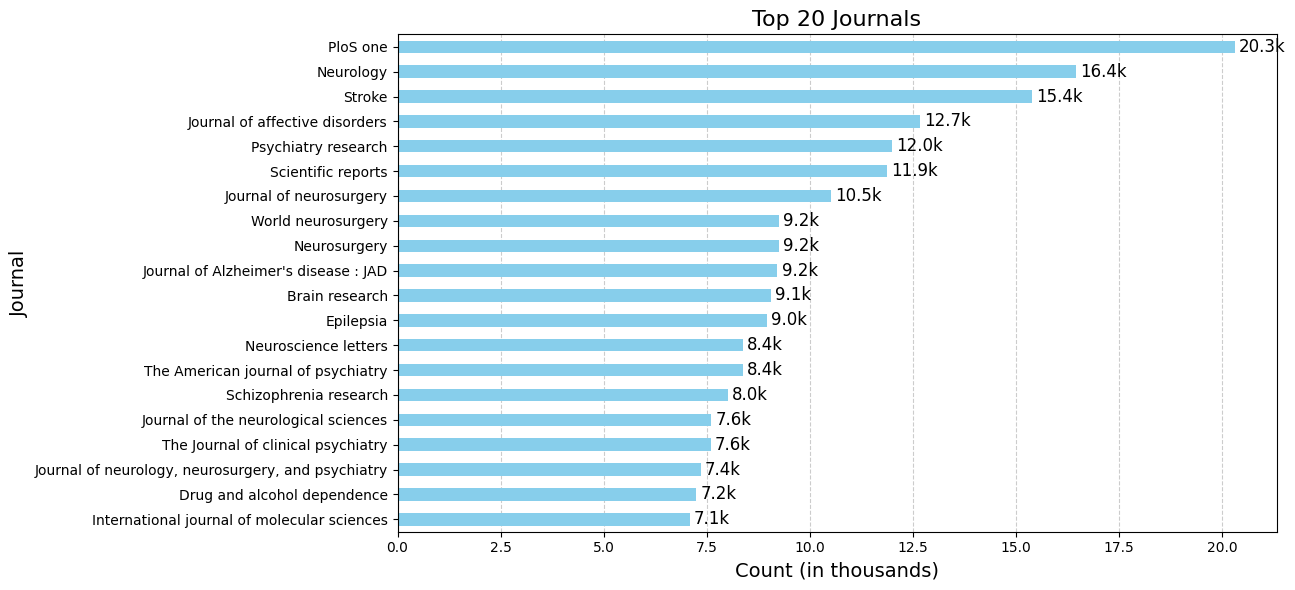

In [561]:
plot_top_journals_count(df_non_empty_abstracts, 'Journal', 'with_abstracts', num_top=20)

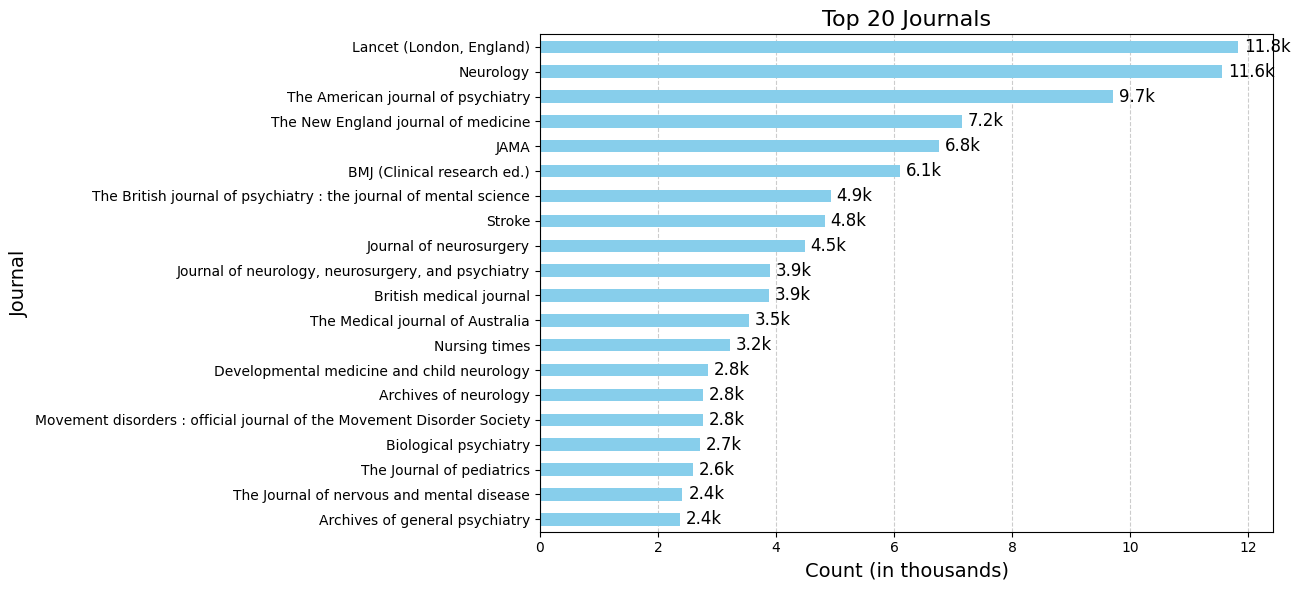

In [563]:
plot_top_journals_count(df_empty_abstracts, 'Journal', 'missing_abstracts', num_top=20)

## Goldhamster predictions

In [291]:
# Path to the folder containing prediction files
predictions_folder = "./model_predictions/neuro_pubmed"

# Initialize an empty list to store data from each file
all_data = []

# Use glob to find all files with the pattern 'predictions_chunk_*.txt'
for file_path in glob.glob(f"{predictions_folder}/predictions_chunk_*.txt"):
    with open(file_path, "r") as file:
        for line in file:
            # Skip empty lines
            if line.strip():
                # Split each line into 'Text <PMID>:' and 'labels'
                pmid_text, labels = line.strip().split(":", 1)
                pmid = pmid_text.strip().split()[1]  # Get the PMID after 'Text'
                labels = labels.strip()  # Get the labels after ':'
                if not labels:
                    labels = "not_assigned"
                # Append to list as a dictionary
                all_data.append({"PMID": pmid, "labels": labels})

# Create a DataFrame from the list
df_predictions = pd.DataFrame(all_data)

In [292]:
df_non_empty_abstracts.shape

(1891731, 6)

In [293]:
df_non_empty_abstracts.head()

,PMID,Year,Journal,Title,AbstractText,DOI
0,15008584,2004.0,Pediatric clinics of North America,Neurologic disorders masquerading as pediatric...,Neurologic disorders may present or masquerade...,10.1016/s0031-3955(03)00180-9
1,15008585,2004.0,Pediatric clinics of North America,Pediatric sleep pharmacology: you want to give...,There is a need for greater information about ...,10.1016/s0031-3955(03)00179-2
2,15008586,2004.0,Pediatric clinics of North America,Nonpharmacologic treatments for pediatric slee...,Because of the high prevalence of sleep proble...,10.1016/s0031-3955(03)00178-0
3,15008589,2004.0,Pediatric clinics of North America,Neurocognitive dysfunction and sleep in childr...,"Sleep disturbance in children, whether because...",10.1016/s0031-3955(03)00184-6
4,15008590,2004.0,Pediatric clinics of North America,Sleep problems in children with common medical...,Sleep problems are common in many pediatric me...,10.1016/s0031-3955(03)00185-8


In [294]:
df_predictions.shape

(1891731, 2)

In [311]:
df_predictions[df_predictions['PMID']=="298"]

,PMID,labels
262996,298,not_assigned


In [331]:
df_non_empty_abstracts['PMID'] = df_non_empty_abstracts['PMID'].astype(int)
df_predictions['PMID'] = df_predictions['PMID'].astype(int)
df_merged = pd.merge(df_non_empty_abstracts, df_predictions, on="PMID", how="left")
#df_merged['Year'] = df_merged['Year'].astype(int)

df_merged.shape

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_7070/297546062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_empty_abstracts['PMID'] = df_non_empty_abstracts['PMID'].astype(int)


(1891731, 7)

In [333]:
df_merged.head()

,PMID,Year,Journal,Title,AbstractText,DOI,labels
0,15008584,2004.0,Pediatric clinics of North America,Neurologic disorders masquerading as pediatric...,Neurologic disorders may present or masquerade...,10.1016/s0031-3955(03)00180-9,not_assigned
1,15008585,2004.0,Pediatric clinics of North America,Pediatric sleep pharmacology: you want to give...,There is a need for greater information about ...,10.1016/s0031-3955(03)00179-2,not_assigned
2,15008586,2004.0,Pediatric clinics of North America,Nonpharmacologic treatments for pediatric slee...,Because of the high prevalence of sleep proble...,10.1016/s0031-3955(03)00178-0,not_assigned
3,15008589,2004.0,Pediatric clinics of North America,Neurocognitive dysfunction and sleep in childr...,"Sleep disturbance in children, whether because...",10.1016/s0031-3955(03)00184-6,not_assigned
4,15008590,2004.0,Pediatric clinics of North America,Sleep problems in children with common medical...,Sleep problems are common in many pediatric me...,10.1016/s0031-3955(03)00185-8,other


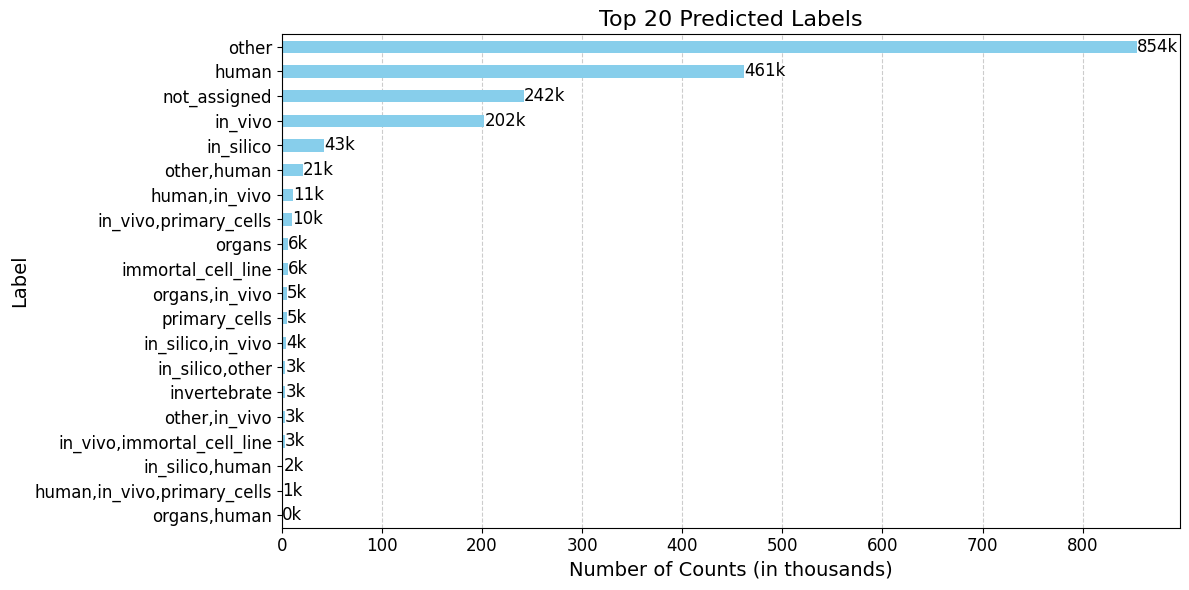

In [578]:
labels_count = df_merged['labels'].value_counts().head(20).sort_values() / 1000

# Plot the bar chart
plt.figure(figsize=(12, 6))
ax = labels_count.plot(kind='barh', color='skyblue',zorder=2)

# Set axis labels and title with increased font size
plt.xlabel('Number of Counts (in thousands)', fontsize=14)
plt.ylabel('Label', fontsize=14)
plt.title('Top 20 Predicted Labels', fontsize=16)

# Set tick label font sizes for both axes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add the count labels on the bars, formatted in thousands with "k"
for i, count in enumerate(labels_count):
    ax.text(count + 0.1, i, f'{count:.0f}k', va='center', fontsize=12)

# Add a light grid for readability
ax.grid(axis='x', linestyle='--', alpha=0.4, color='gray', zorder=0)

plt.tight_layout()
plt.savefig(f"./viz/neuro_pubmed/goldhamster_label_count_{len(df_merged)}.png")

plt.show()

In [225]:
df_merged[df_merged['labels']=='human,in_vivo']

,PMID,Year,Journal,Title,AbstractText,DOI,labels
1034,15026334,2004.0,Cancer research,Cyr61 is overexpressed in gliomas and involved...,Cyr61 is a member of the CCN family of growth ...,10.1158/0008-5472.can-03-0666,"human,in_vivo"
1035,15026350,2004.0,Cancer research,Human alpha-lactalbumin made lethal to tumor c...,Malignant brain tumors present a major therape...,10.1158/0008-5472.can-03-2661,"human,in_vivo"
1218,15029197,2004.0,Nature,The candidate tumour suppressor protein ING4 r...,Gliomas are the most common primary tumours of...,10.1038/nature02329,"human,in_vivo"
1754,15037672,2004.0,Neurology,Mechanisms of epileptogenicity in cortical dys...,Cortical dysplasias (CDs) increasingly are rec...,10.1212/01.wnl.0000114506.49267.bb,"human,in_vivo"
2612,15054880,2004.0,International journal of cancer,Highly efficient DNA incorporation of intratum...,Intratumoural (i.t.) injection of radio-iodode...,10.1002/ijc.20112,"human,in_vivo"
...,...,...,...,...,...,...,...
1890777,15269665,2004.0,Revue neurologique,Neuromyotonia.,There is increasing evidence that autoimmunity...,10.1016/s0035-3787(04)71010-3,"human,in_vivo"
1891281,15277581,2004.0,The Journal of pharmacology and experimental t...,"ABT-963 [2-(3,4-difluoro-phenyl)-4-(3-hydroxy-...",Nonsteriodal anti-inflammatory drugs (NSAIDs) ...,10.1124/jpet.104.070052,"human,in_vivo"
1891439,15279714,2004.0,Neuro-oncology,Antitumor effects of specific telomerase inhib...,Telomerase is a ribonucleoprotein complex that...,10.1215/S1152851704000055,"human,in_vivo"
1891595,15282781,2004.0,Rapid communications in mass spectrometry : RCM,Mass spectrometric analysis of ceramide pertur...,"In this study, the levels and composition of c...",10.1002/rcm.1520,"human,in_vivo"


In [599]:
invivo_human_insilico_df = df_merged[df_merged['labels'].isin(["in_vivo", "human", "in_silico"])]
print("original size ", invivo_human_insilico_df.shape)

invivo_human_insilico_df = invivo_human_insilico_df.dropna(subset=['Year'])

# Convert 'Year' to integer
invivo_human_insilico_df['Year'] = invivo_human_insilico_df['Year'].astype(int)

invivo_human_insilico_df.shape

original size  (706306, 7)


(705218, 7)

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_7070/3086533172.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_yticklabels(['{:.0f}%'.format(x * 100) for x in axs[1].get_yticks()])


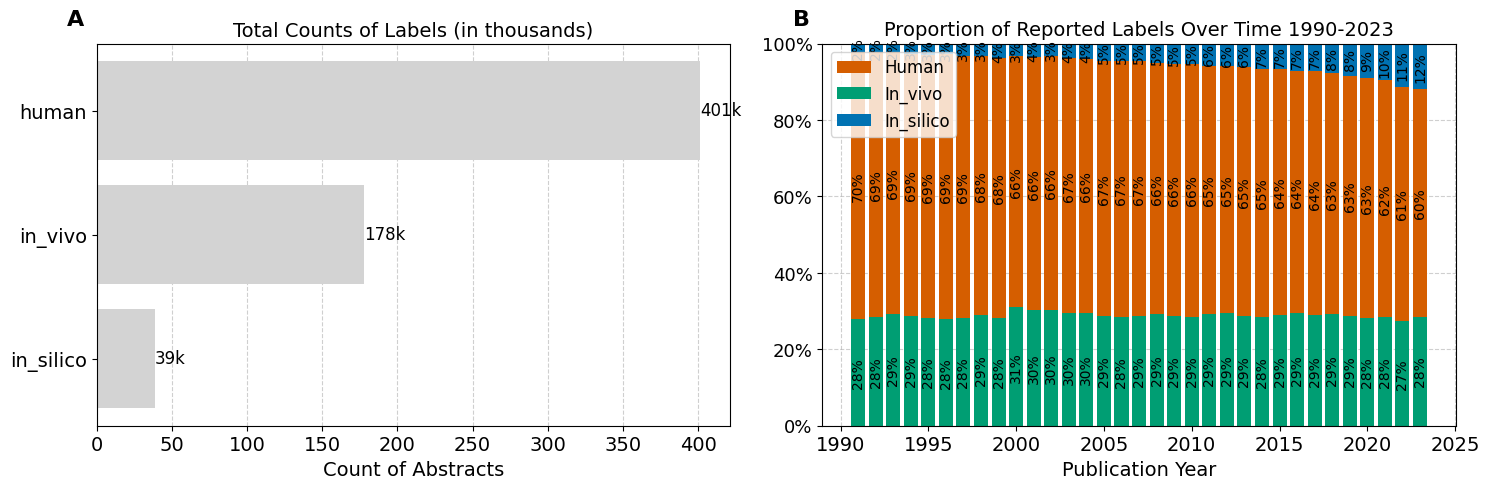

In [603]:
from_year = 1990
to_year = 2024
invivo_human_insilico_df = invivo_human_insilico_df[(invivo_human_insilico_df['Year'] > from_year) & (invivo_human_insilico_df['Year'] < to_year)]

label_counts = invivo_human_insilico_df['labels'].value_counts().sort_values()/1000

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot A - Total Count of Each Label
bars_0 = axs[0].barh(label_counts.index, label_counts, color='lightgrey', zorder=2)
for bar in bars_0:
    width = bar.get_width()
    axs[0].text(width, bar.get_y() + bar.get_height() / 2, f'{width:.0f}k', va='center', fontsize=12)
axs[0].tick_params(axis='y', labelsize=14)
axs[0].tick_params(axis='x', labelsize=14)
axs[0].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
axs[0].set_xlabel('Count of Abstracts', fontsize=14)
axs[0].set_title('Total Counts of Labels (in thousands)', fontsize=14)
#axs[0].set_xlim(0, max(label_counts) + 5)
axs[0].text(-0.02, 1.09, 'A', transform=axs[0].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

### Plot B - Proportion of Labels Over Time
label_colors = {
    'in_vivo': '#009E73',        # Bluish Green
    'human': '#D55E00',          # Vermilion
    'in_silico': '#0072B2',      # Blue
}
label_types = ['in_vivo', 'human', 'in_silico']

# Group by Year and labels, then count unique PMIDs
unique_pairs_labels = invivo_human_insilico_df[['PMID', 'labels', 'Year']].drop_duplicates()
labels_over_time = unique_pairs_labels.groupby(['Year', 'labels']).size().unstack(fill_value=0)

# Calculate the proportion of each label from all abstracts for each year
label_proportion_over_time = labels_over_time.div(labels_over_time.sum(axis=1), axis=0)

# Plot for Labels Over Time (Plot B - Proportions)
bottom = np.zeros(len(label_proportion_over_time))
for label_type in label_types:
    bars = axs[1].bar(label_proportion_over_time.index, 
                      label_proportion_over_time[label_type], 
                      bottom=bottom, 
                      label=label_type,
                      color=label_colors.get(label_type, 'gray'), zorder=2)
    bottom += label_proportion_over_time[label_type]

    # Add labels to each segment
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, f'{height:.0%}', ha='center', va='center', fontsize=10, rotation=90)

axs[1].set_xlabel('Publication Year', fontsize=14)
axs[1].set_title(f'Proportion of Reported Labels Over Time {from_year}-{to_year-1}', fontsize=14)
axs[1].set_ylim(0, 1)
axs[1].set_yticklabels(['{:.0f}%'.format(x * 100) for x in axs[1].get_yticks()])

# Sorting the legend handles
handles, labels = axs[1].get_legend_handles_labels()
label_type_totals = labels_over_time.sum().to_dict()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: label_type_totals.get(x[1], 0), reverse=True)
sorted_handles, sorted_labels = zip(*sorted_handles_labels)
sorted_labels = [label.capitalize() for label in sorted_labels]
axs[1].legend(sorted_handles, sorted_labels, fontsize=12, loc='upper left')

axs[1].grid(linestyle='--', alpha=0.6, zorder=1)
axs[1].tick_params(axis='x', labelsize=14)
axs[1].tick_params(axis='y', labelsize=13)
axs[1].text(-0.02, 1.09, 'B', transform=axs[1].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Adjust layout
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f"./viz/neuro_pubmed/goldhamster_human_invivo_silico_count_{len(invivo_human_insilico_df)}_{from_year}-{to_year}.png")

# Display the plots
plt.show()

## Possibly relevant animal studies

In [607]:
df_merged.shape

(1891731, 7)

In [605]:
filtered_all_to_keep_df = df_merged[df_merged['labels'].str.contains(r'\b(in_vivo|organs|immortal_cell_line|primary_cells|other|not_assigned)\b')]
filtered_all_to_keep_df.shape

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_7070/3710249203.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_all_to_keep_df = df_merged[df_merged['labels'].str.contains(r'\b(in_vivo|organs|immortal_cell_line|primary_cells|other|not_assigned)\b')]


(1382531, 7)

In [609]:
1382531/1891731

0.7308285374611929

In [376]:
filtered_all_to_keep_df.head()

,PMID,Year,Journal,Title,AbstractText,DOI,labels
0,15008584,2004.0,Pediatric clinics of North America,Neurologic disorders masquerading as pediatric...,Neurologic disorders may present or masquerade...,10.1016/s0031-3955(03)00180-9,not_assigned
1,15008585,2004.0,Pediatric clinics of North America,Pediatric sleep pharmacology: you want to give...,There is a need for greater information about ...,10.1016/s0031-3955(03)00179-2,not_assigned
2,15008586,2004.0,Pediatric clinics of North America,Nonpharmacologic treatments for pediatric slee...,Because of the high prevalence of sleep proble...,10.1016/s0031-3955(03)00178-0,not_assigned
3,15008589,2004.0,Pediatric clinics of North America,Neurocognitive dysfunction and sleep in childr...,"Sleep disturbance in children, whether because...",10.1016/s0031-3955(03)00184-6,not_assigned
4,15008590,2004.0,Pediatric clinics of North America,Sleep problems in children with common medical...,Sleep problems are common in many pediatric me...,10.1016/s0031-3955(03)00185-8,other


In [343]:
filtered_in_vivo_df = df_merged[df_merged['labels'].str.contains(r'\b(in_vivo)\b')]
filtered_in_vivo_df.shape

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_7070/454003945.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_in_vivo_df = df_merged[df_merged['labels'].str.contains(r'\b(in_vivo)\b')]


(242079, 7)

In [345]:
filtered_in_vivo_df.head()

,PMID,Year,Journal,Title,AbstractText,DOI,labels
33,15008957,2004.0,Clinical and experimental pharmacology & physi...,Nitric oxide release in the nucleus tractus so...,1. The purpose of the present study was to inv...,10.1111/j.1440-1681.2004.03967.x,in_vivo
41,15009014,2004.0,Cephalalgia : an international journal of head...,Noxious chemical stimulation of rat facial muc...,Cluster headache is characterized by typical a...,10.1111/j.1468-2982.2004.00649.x,in_vivo
66,15009425,2004.0,Immunology,Factors affecting the susceptibility of the mo...,"We have previously shown, in a transgenic mous...",10.1111/j.1365-2567.2004.01821.x,in_vivo
79,15009507,2004.0,Journal of pineal research,Melatonin reduces disseminate neuronal death a...,"The effects of i.p. melatonin (4 + 4 mg/kg, af...",10.1046/j.1600-079x.2003.00115.x,in_vivo
82,15009619,2004.0,The journal of obstetrics and gynaecology rese...,Lipopolysaccharide administration enhances hyp...,To determine whether inflammation and hypoxic-...,10.1111/j.1447-0756.2003.00174.x,in_vivo


In [414]:
file_path = 'data/in_vivo_pmids_en.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Strip whitespace and convert each line to an integer
pmid_list_in_vivo = [int(line.strip()) for line in lines]

In [416]:
len(pmid_list_in_vivo)

140013

In [418]:
pmid_set_df = set(filtered_in_vivo_df['PMID'])

# Find the intersection of the PMIDs from the file and the DataFrame
matched_pmids = set(pmid_list_in_vivo).intersection(pmid_set_df)

# Count the matches
num_matches = len(matched_pmids)
num_matches, num_matches/len(pmid_list)

(128870, 0.9204145329362273)

In [420]:
non_intersecting_pmids = set(pmid_list_in_vivo) - pmid_set_df


In [422]:
pmid_set_df = set(filtered_all_to_keep_df['PMID'])

# Find the intersection of the PMIDs from the file and the DataFrame
matched_pmids = set(pmid_list_in_vivo).intersection(pmid_set_df)

# Count the matches
num_matches = len(matched_pmids)
num_matches, num_matches/len(pmid_list)

(135827, 0.9701027761707841)

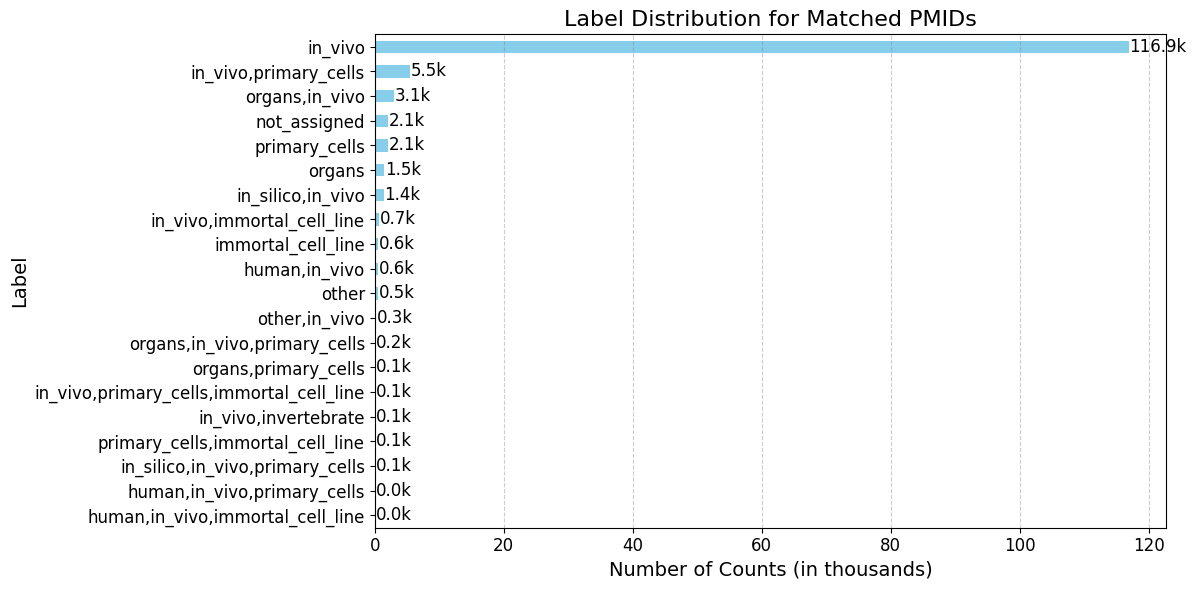

In [617]:
matched_df = filtered_all_to_keep_df[filtered_all_to_keep_df['PMID'].isin(matched_pmids)]

# Get the label distribution and convert counts to thousands
label_counts = matched_df['labels'].value_counts().head(20).sort_values() / 1000

# Plot the label distribution
plt.figure(figsize=(12, 6))
ax = label_counts.plot(kind='barh', color='skyblue')

# Set labels and title with increased font sizes
plt.xlabel('Number of Counts (in thousands)', fontsize=14)
plt.ylabel('Label', fontsize=14)
plt.title('Label Distribution for Matched PMIDs', fontsize=16)

# Customize tick label sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add count labels on each bar in thousands with "k"
for i, count in enumerate(label_counts):
    ax.text(count + 0.1, i, f'{count:.1f}k', va='center', fontsize=12)

# Add a light grid on the x-axis for readability
ax.grid(axis='x', linestyle='--', alpha=0.4, color='gray')

plt.tight_layout()
plt.savefig(f"./viz/neuro_pubmed/goldhamster_vs_custom_query_invivo_{len(matched_df)}.png")

plt.show()

In [424]:
non_intersecting_pmids = set(pmid_list_in_vivo) - pmid_set_df
len(non_intersecting_pmids), list(non_intersecting_pmids)[:10]

(4186,
 [9453568,
  9453570,
  172038,
  31096839,
  2940936,
  9453577,
  1638410,
  38101001,
  7839750,
  7839751])

In [426]:
file_path = 'data/cns_psychiatric_diseases_pmids_en.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Strip whitespace and convert each line to an integer
pmid_list_full = [int(line.strip()) for line in lines]
len(pmid_list_full)

2498422

In [430]:
non_intersecting_pmids = set(pmid_list_in_vivo) - set(pmid_list_full)
len(non_intersecting_pmids), list(non_intersecting_pmids)[:10]

(0, [])